### 이미지 로데이터 파일에서 데이터 추출

In [156]:
## [1] 파일입출력 방식
## with open () as ~ 

file_path ='../data/MNIST/t10k-images-idx3-ubyte' #나는 바로 파일이 있어서 이렇게 해야 함

In [157]:
# 파일 읽을 때 고려사항 => mode=br : 바이트 읽기 모드(br)
with open(file_path,mode='br') as f:
    all_data = f.read()
    

In [158]:
print(type(all_data),len(all_data))
print(all_data[:100])

<class 'bytes'> 7840016
b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00"


In [159]:
# 파일 읽을 때 고려사항 => mode=br : 바이트 읽기 모드(br)
with open(file_path,mode='br') as f:
    magic_code = f.read(4)
    print(magic_code)
    
    data_length=f.read(4)
    print(data_length)
    
    row=f.read(4)
    print(row)
    
    col=f.read(4)
    print(col)
    
    

b'\x00\x00\x08\x03'
b"\x00\x00'\x10"
b'\x00\x00\x00\x1c'
b'\x00\x00\x00\x1c'


In [160]:
# 전부 바이트로 나옴
# 바이트 ==> 알아보는 문자로
row.hex() #앞에 x때주고, 문자열이 됨

'0000001c'

In [161]:
hex(10) #문자열:0x로 준다


'0xa'

- [2] 파이썬의 byte 데이터 변환 모듈  struct 활용

In [162]:
### 모듈로딩
import struct,os

In [163]:
### => 데이터 추출 및 저장 관련 변수
### 학습용 : train.csv
### 테스트용: test.csv
### 위치: ../data.txt

save_dir='../data/txt/'
data_dir='../data/MNIST/'
train_file=data_dir+'train.csv'
test_file=data_dir+'test.csv'


In [164]:
### 사용자 정의 함수 
### 기    능: raw data 파일을 읽어서 csv 파일로 저장
### 함 수명 : to_csv
### 매개변수: 파일 이름,데이터수
### 반환값: 파일 생성 여부 True/False

#디버깅 출력 제어 플래그 변수
DEBUG=False

def to_csv(name,maxdata):
    # (1) CSV 저장할 데이터 준비
    # 레이블 파일과 이미지 파일 열기
    lbl_f=open("../data/MNIST/"+name+"-labels-idx1-ubyte","rb")
    img_f=open("../data/MNIST/"+name+"-images-idx3-ubyte","rb")
    
    #CSV파일 생성
    csv_f=open("../data/MNIST/"+name+".csv","w",encoding="utf-8")
    
    #헤더 정보 읽기 
    mag,lbl_count=struct.unpack(">II",lbl_f.read(8))#매직코드+레이블 갯수 
    mag,img_count=struct.unpack("II",img_f.read(8)) #매직코드 +이미지 개수
    rows,cols=struct.unpack(">II",img_f.read(8))  #행,열 갯수
    pixels=rows *cols  #전체 raw 데이터의 수
    
    if DEBUG:
        print('lbl_count:,img_count {}'.format(lbl_count,img_count))
        print('rows {},cols {:}'.format(rows,cols))
    
    #(2) 이미지 데이터를 읽고 csv로 저장
    for idx in range(lbl_count):
        if idx > maxdata:break
        
        #숫자이미지 데이터가 의미하는 숫자값 읽기
        #튜플타입 리턴 -> 1개 데이터 (value,)
        label=struct.unpack("B",lbl_f.read(1))[0]
        if DEBUG:print('label =>{}'.format(label))
        
        #이미지 데이터 읽기 
        bdata=img_f.read(pixels)
        sdata=list(map(lambda n:str(n),bdata)) #문자열로 변환
        if DEBUG:print('sdata => {}'.format(sdata))
        
        #csv 파일에 쓰기 =>라벨,데이터1,데이터2,....데이터784,
        csv_f.write(str(label)+",")     #숫자 라벨 쓰기
        csv_f.write(','.join(sdata) +"\n")  #문자열 변환 쓰기
    
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
    #생성된 파일 존재 여부 확인 후 반환 
    return os.path.exists(data_dir+f'{name}.csv')

In [165]:
name ='train'
os.path.exists(data_dir+f'{name}.csv')
data_dir+f'{name}.csv'

'../data/MNIST/train.csv'

In [166]:
# 학습용 데이터 파일 생성
to_csv('train',10000)

True

In [167]:
# 테스트용 데이터 파일 생성
to_csv('t10k',1000)

True

[3] 이미지 데이터 로딩 후 시각화 <hr>


[3-1] 이미지 데이터 로딩 csv =>  또는DataFrame 또는 Numpy

In [168]:
import pandas as pd
import numpy as np

In [169]:
file='../data/MNIST/t10k.csv'

In [170]:
testDF=pd.read_csv(file,header=None)

In [171]:
testDF

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
testDF[0]

0       7
1       2
2       1
3       0
4       4
       ..
996     2
997     0
998     8
999     9
1000    9
Name: 0, Length: 1001, dtype: int64

In [173]:
trainDF=pd.read_csv('../data/MNIST/train.csv',header=None)
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [174]:
trainDF

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
import matplotlib.pyplot as plt

In [176]:
#이미지 데이터와 라벨 분리
labels=trainDF[0]
img_data= trainDF.iloc[:,1:]  #라벨은 떼고 이미지 데이터만 가지고 오기(컬럼 뗄때는 모든 행의 나머지 컬럼)
#실수: trainDFP[1:]
labels.shape,img_data.shape

((10001,), (10001, 784))

[3-2] 데이터 시각화

In [177]:
# 1D 이미지 데이터 => 2D 이미지 데이터 변환
raw_img=img_data.iloc[0].values #0번원소의 nd.array화

type(raw_img),raw_img.shape,raw_img.ndim

(numpy.ndarray, (784,), 1)

In [178]:
raw_img=raw_img.reshape(28,28)
#raw_img.reshape(-1,28)
type(raw_img),raw_img.shape,raw_img.ndim

(numpy.ndarray, (28, 28), 2)

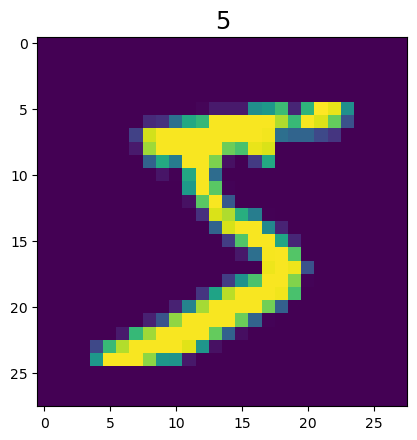

In [179]:
#시각화
plt.imshow(raw_img)
plt.title(labels[0],fontsize='xx-large')
plt.show()

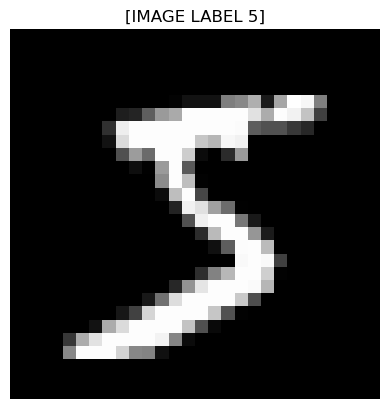

In [180]:
#시각화

plt.imshow(raw_img,cmap='gray')
plt.title(f'[IMAGE LABEL {labels[0]}]')
plt.axis('off') # 축과 이름들을 제거
plt.show()